In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import csv

import pandas as pd

# Plot cosmetics

In [2]:
title_size = 20
axislabel_size = 20
axistick_size = 16

# Load data

In [3]:
directory = '/home/preston/Desktop/Science/Research/astrophys/pulsar_time-variability/data/J1311_5min/'
file_name = 'new_J1311_lc.txt'
file_path = directory + file_name

In [4]:
f = open(file_path, 'r')
reader = csv.reader(f, delimiter = ',')
header = reader.next()
#header = [header[0].split(' ')[1], header[2].split(' ')[1], header[3].split(' ')[1], header[4].split(' ')[1].split('=')[0]]

print header

['2.395575670000E+08', '3.000000000000E+02', '0', '1.866025E+00', '0.000000E+00', 'NULL', 'NULL']


In [5]:
names = ['TIME', 'TIMEDEL', 'COUNTS', 'ERROR', 'EXPOSURE', 'FLUX', 'RATE_ERROR']
names = [name.lower() for name in names]

In [6]:
df = pd.read_csv(file_path, header = None, names = names, sep = ',', skiprows = 1,\
                 dtype = {header[0]: np.float64, header[1]: int, header[2]: np.float64, header[3]: np.float64})

In [7]:
df.head()

,time,timedel,counts,error,exposure,flux,rate_error
0,239557867.0,300.0,0,1.866025,0.0,NaN,NaN
1,239558167.0,300.0,0,1.866025,0.0,NaN,NaN
2,239558467.0,300.0,0,1.866025,0.0,NaN,NaN
3,239558767.0,300.0,0,1.866025,0.0,NaN,NaN
4,239559067.0,300.0,0,1.866025,0.0,NaN,NaN


In [8]:
df.describe()

,time,timedel,counts,error,exposure,flux,rate_error
count,8.486340e+05,848634.000000,848634.000000,848634.000000,848634.000000,2.542400e+05,254240.000000
mean,3.668528e+08,299.999733,0.016422,1.873442,79228.706715,2.154178e-07,0.000514
std,7.349390e+07,0.246414,0.132635,0.059332,164418.689690,2.828293e-06,0.009124
min,2.395579e+08,73.000000,0.000000,1.866025,0.000000,0.000000e+00,0.000003
25%,3.032053e+08,300.000000,0.000000,1.866025,0.000000,0.000000e+00,0.000004
50%,3.668528e+08,300.000000,0.000000,1.866025,0.000000,0.000000e+00,0.000008
75%,4.305003e+08,300.000000,0.000000,1.866025,27939.125000,0.000000e+00,0.000029
max,4.941477e+08,300.000000,4.000000,3.179450,649116.100000,6.821917e-04,1.611022


# General

- Sampling frequency of data is 300 s (5 minutes), but not all measurements have data
- The full data set is over 8 years (Fermi launched in June 2008)

In [9]:
time = df['time'].values

In [10]:
# Get data sampling period, frequency
print 'period', time[1]-time[0]
print 'freq', 1./(time[1]-time[0])
print 'full duration (s)', time[-1] - time[0]
print 'full duration (y)', (time[-1] - time[0])/(60*60*24*365.0)

period 300.0
freq 0.00333333333333
full duration (s) 254589786.5
full duration (y) 8.07298917111


In [11]:
max_time = time[-1] - time[0]
print max_time

254589786.5


# Plot all data

In [12]:
time = df[(df['exposure'] == 0) == False][['time']].values
time = time-time[0]

orbital_period_hours = 9.12
orbital_period_seconds = int(orbital_period_hours*60*60)
time_mod = time%orbital_period_seconds

counts = df[(df['exposure'] == 0) == False][['counts']].values.reshape(-1,1)

exposure = df[(df['exposure'] == 0) == False][['exposure']].values.reshape(-1,1)

flux = df[(df['exposure'] == 0) == False][['flux']].values.reshape(-1,1)

In [13]:
print orbital_period_seconds

32831


In [14]:
# Shift time to t_0 = 0 s
#for np_array in [counts,exposure,flux]:
#    np_array[:,0] = np_array[:,0] - np_array[0,0]

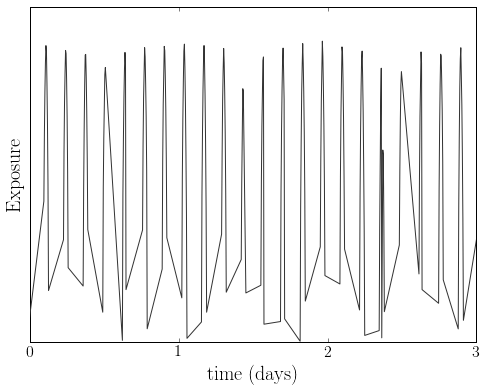

In [16]:
"""
plt.plot(time, counts)
plt.xlim(0,100000)
plt.ylim(0,3)
plt.yticks([])
plt.show()

plt.plot(time, flux)
plt.xlim(0,100000)
plt.ylim(0, .000003)
plt.yticks([])
plt.show()
"""

fig = plt.figure(figsize = (8,6))
plt.plot(time/(60*60*24), exposure, zorder = 100, c = (0.2, 0.2, 0.2))
plt.tick_params(labelsize = axistick_size)
plt.xlim(1000,1003)
plt.xticks([1000, 1001, 1002, 1003], ['0', '1', '2', '3', '4'])
plt.yticks([])
plt.xlabel('time (days)', size = axislabel_size)
plt.ylabel('Exposure', size = axislabel_size)

plt.savefig('./fermi_exposures.png', dpi = 120)

plt.show()

# Find time between exposure periods

- Data shows long exposures and intermediate exposures are alternated at the same frequency

- Time between major exposure periods is 190 minutes
- Time between major exposure and intermediate exposure is 95 minutes (Fermi orbital period is 96.5 minutes)

In [111]:
i1 = -30
i2 = -20
plt.plot(exposure[i1:i2,0], exposure[i1:i2,1])
plt.show()

i1 = -20
i2 = -15
plt.plot(exposure[i1:i2,0], exposure[i1:i2,1])
plt.show()

i1 = -200
i2 = -1
plt.plot(exposure[i1:i2,0], exposure[i1:i2,1])
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [112]:
peak_1_time = exposure[np.argsort(exposure[-30:-20,1])[-1] + exposure.shape[0] - 30, 0]
peak_2_time = exposure[np.argsort(exposure[-20:-15,1])[-1] + exposure.shape[0] - 20, 0]
print peak_1_time
print peak_2_time

print (peak_2_time - peak_1_time)/60.

IndexError: index 1 is out of bounds for axis 1 with size 1

# Flux

## Plot flux windowed to orbital period

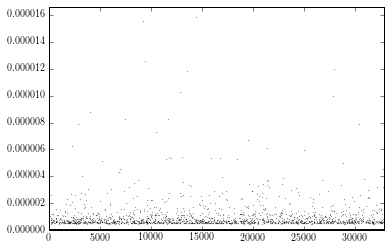

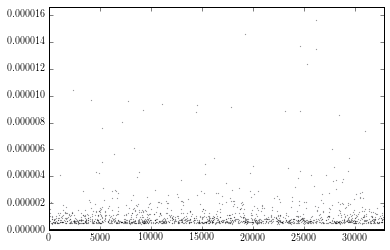

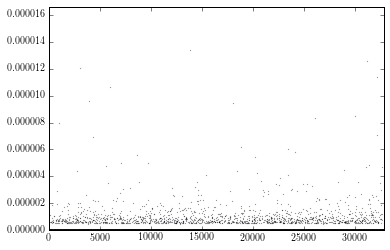

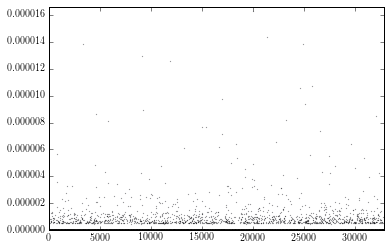

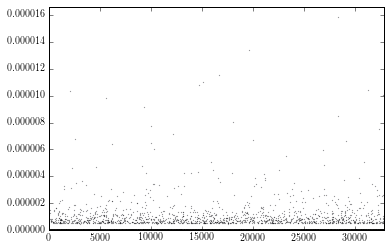

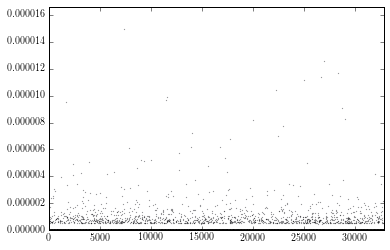

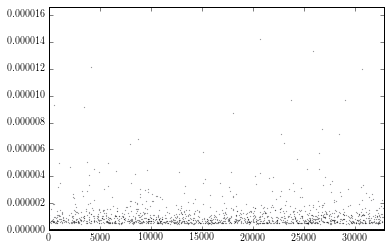

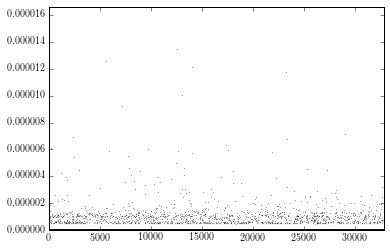

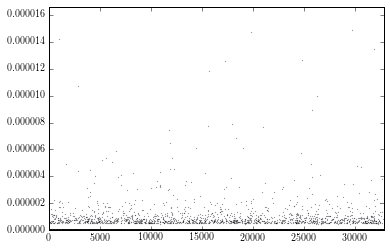

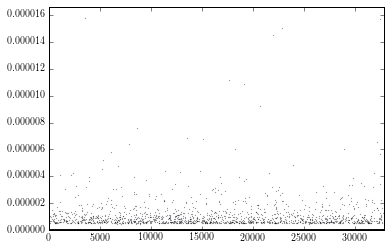

In [82]:
intervals = 10
interval = time.shape[0]/intervals
for i in range(intervals):
    i1 = interval*i
    i2 = interval*(i+1)
    
    plt.scatter(time_mod[i1:i2], flux[i1:i2], marker = '.', s = .1)
    plt.xlim(np.min(time_mod), np.max(time_mod))
    plt.ylim(np.min(flux), np.max(flux)/4.)
    plt.show()

# Plot flux histogram windowed to orbital period

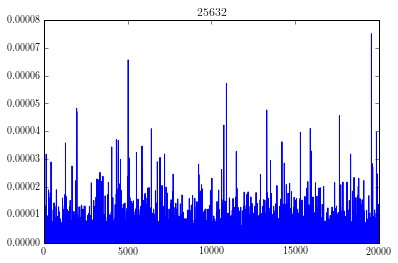

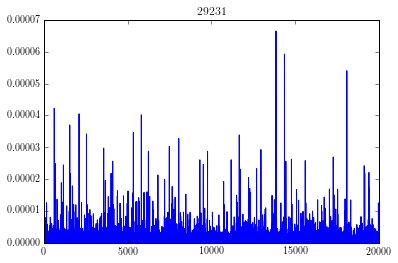

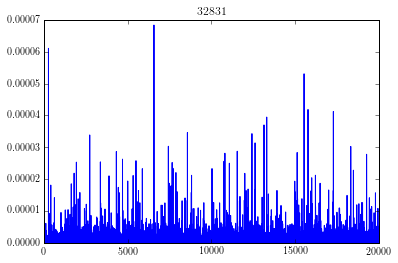

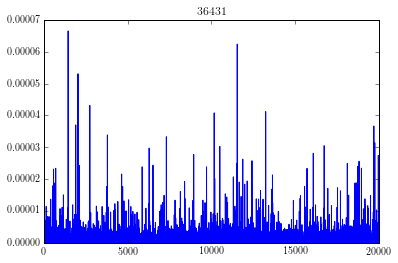

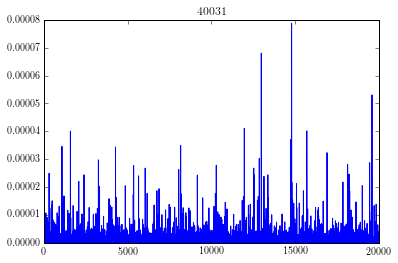

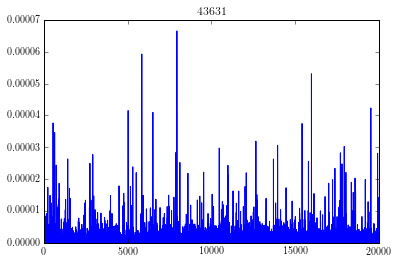

In [221]:
for orbital_period_hours in [7.12,8.12,9.12,10.12,11.12,12.12]:

    orbital_period_seconds = int(orbital_period_hours*60*60)

    time_mod = t%orbital_period_seconds
    num_bins = 20000
    flux_counts = [0 for i in range(num_bins)]
    for i in range(flux.shape[0]):
        t = time[i,0]
        t_mod = t%orbital_period_seconds
        binn = int(1.*t_mod/orbital_period_seconds*num_bins)
        flux_counts[binn] += flux[i,0]
        
    plt.plot(flux_counts)
    plt.title(orbital_period_seconds)
    plt.show()

## Plot over one day

In [114]:
def year_to_sec(years):
    return years*365*24*60*60
def day_to_sec(days):
    return days*24*60*60

In [57]:
def get_index(t):
    index = 0
    index_found = False
    
    while index_found == False:
        if time[index] >= t:
            index_found = True
        else:
            index += 1
            
    return index

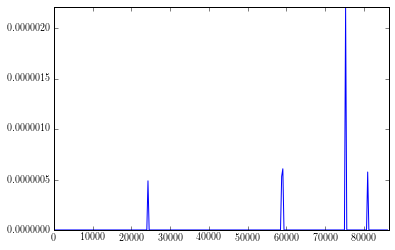

In [90]:
t1 = day_to_sec(0)
t2 = day_to_sec(1)

i1 = get_index(t1)
i2 = get_index(t2)

fig, ax = plt.subplots()
ax.plot(time[i1:i2], flux[i1:i2])
ax.plot(time[i1:i2], exposure[i1:i2])

#for i in range(i1, i2-1):
    #ax.axvspan(time[i], time[i+1], ymin = 0, ymax = 100, alpha = .2, color = (1,0,0))


ax.set_xlim(t1,t2)
ax.set_ylim(0,np.max(flux[i1:i2]))
plt.show()

# Lomb-Scargle periodogram

In [56]:
import numpy as np
import astropy

In [63]:
freqs = np.linspace(0,9.9,100)
orbital_period_hours = 9.12
orbital_period_days = orbital_period_hours/24.0
orbital_frequency_days = 1/orbital_period_days
print orbital_frequency_days

2.63157894737


In [73]:
i1 = int(0)
i2 = int(10*time.shape[0]/10.)

In [75]:
print time.shape[0]

284020


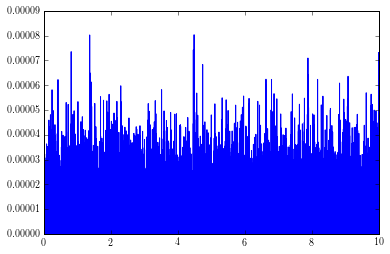

In [74]:
frequency, power = astropy.stats.LombScargle(time[i1:i2].flatten()/(60*60*24.0),\
                                             flux[i1:i2].flatten()).autopower(maximum_frequency = 10)

plt.plot(frequency, power)
plt.show()

In [79]:
t_fit = np.linspace(0, 1./orbital_frequency_days)
y_fit = LombScargle(time[i1:i2].flatten(), flux[i1:i2].flatten()).model(t_fit, orbital_frequency_days)

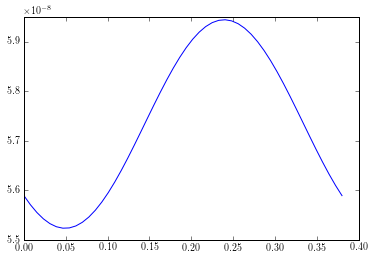

In [80]:
plt.plot(t_fit, y_fit)
plt.show()

In [81]:
print flux

[[  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 ..., 
 [  1.72726189e-06]
 [  0.00000000e+00]
 [  0.00000000e+00]]
